## Basic RNN Model For Time Series Predictions

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [36]:
training_set = pd.read_csv('dataset/Google_Stock_Price_Train.csv')
training_set = training_set.iloc[:, 1:2].values

In [40]:
training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [37]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [38]:
X_train = training_set[0:1257]
y_train = training_set[1:1258]

In [41]:
X_train = np.reshape(X_train, (1257, 1, 1))
X_train

array([[[0.08581368]],

       [[0.09701243]],

       [[0.09433366]],

       ...,

       [[0.95163331]],

       [[0.95725128]],

       [[0.93796041]]])

In [42]:
from tensorflow.contrib.keras.api.keras.models import Sequential
from tensorflow.contrib.keras.api.keras.layers import Dense
from tensorflow.contrib.keras.api.keras.layers import LSTM

In [44]:
regressor = Sequential()

In [45]:
regressor.add(LSTM(units=4, activation='sigmoid', input_shape=(None, 1)))

W1116 09:58:04.094354 10256 deprecation.py:506] From C:\Program Files\Python36\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [46]:
regressor.add(Dense(units=1))

In [47]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [48]:
regressor.fit(X_train, y_train, batch_size=32, epochs=200)

W1116 09:58:31.972651 10256 deprecation.py:323] From C:\Program Files\Python36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/200
1257/1257 [==============================] - 12s 10ms/sample - loss: 0.1132
Epoch 2/200
1257/1257 [==============================] - 0s 162us/sample - loss: 0.0870
Epoch 3/200
1257/1257 [==============================] - 0s 159us/sample - loss: 0.0768
Epoch 4/200
1257/1257 [==============================] - 0s 162us/sample - loss: 0.0735
Epoch 5/200
1257/1257 [==============================] - 0s 163us/sample - loss: 0.0720
Epoch 6/200
1257/1257 [==============================] - 0s 162us/sample - loss: 0.0707
Epoch 7/200
1257/1257 [==============================] - 0s 162us/sample - loss: 0.0692
Epoch 8/200
1257/1257 [==============================] - 0s 162us/sample - loss: 0.0678
Epoch 9/200
1257/1257 [==============================] - 0s 166us/sample - loss: 0.0663
Epoch 10/200
1257/1257 [==============================] - 0s 182us/sample - loss: 0.0648
Epoch 11/200
1257/1257 [==============================] - 0s 192us/sample - loss: 0.0631
Epoch 12/200
1257/1257 [======

1257/1257 [==============================] - 0s 167us/sample - loss: 2.4495e-04
Epoch 91/200
1257/1257 [==============================] - 0s 184us/sample - loss: 2.4516e-04
Epoch 92/200
1257/1257 [==============================] - 0s 174us/sample - loss: 2.4509e-04
Epoch 93/200
1257/1257 [==============================] - 0s 167us/sample - loss: 2.4632e-04
Epoch 94/200
1257/1257 [==============================] - 0s 181us/sample - loss: 2.4474e-04
Epoch 95/200
1257/1257 [==============================] - 0s 178us/sample - loss: 2.4481e-04
Epoch 96/200
1257/1257 [==============================] - 0s 187us/sample - loss: 2.4506e-04
Epoch 97/200
1257/1257 [==============================] - 0s 159us/sample - loss: 2.4449e-04
Epoch 98/200
1257/1257 [==============================] - 0s 172us/sample - loss: 2.4597e-04
Epoch 99/200
1257/1257 [==============================] - 0s 166us/sample - loss: 2.4569e-04
Epoch 100/200
1257/1257 [==============================] - 0s 179us/sample - loss: 

1257/1257 [==============================] - 0s 168us/sample - loss: 2.4787e-04
Epoch 178/200
1257/1257 [==============================] - 0s 154us/sample - loss: 2.4555e-04
Epoch 179/200
1257/1257 [==============================] - 0s 177us/sample - loss: 2.4479e-04
Epoch 180/200
1257/1257 [==============================] - 0s 160us/sample - loss: 2.4633e-04
Epoch 181/200
1257/1257 [==============================] - 0s 170us/sample - loss: 2.5113e-04
Epoch 182/200
1257/1257 [==============================] - 0s 174us/sample - loss: 2.4547e-04
Epoch 183/200
1257/1257 [==============================] - 0s 166us/sample - loss: 2.4502e-04
Epoch 184/200
1257/1257 [==============================] - 0s 170us/sample - loss: 2.4976e-04
Epoch 185/200
1257/1257 [==============================] - 0s 164us/sample - loss: 2.4559e-04
Epoch 186/200
1257/1257 [==============================] - 0s 179us/sample - loss: 2.4596e-04
Epoch 187/200
1257/1257 [==============================] - 0s 168us/sample

In [52]:
test_set = pd.read_csv('dataset/Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:, 1:2].values

In [53]:
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

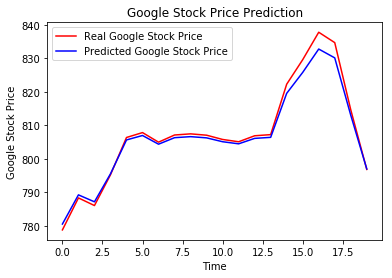

In [54]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

We notice that we had some really good predictions!